In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.utils import plot_model

In [10]:
batch_size = 100
img_height = 250
img_width = 250

In [13]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 791 files belonging to 2 classes.


In [14]:
validation_data =  tf.keras.preprocessing.image_dataset_from_directory(
    'data/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 98 files belonging to 2 classes.


In [15]:
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 100 files belonging to 2 classes.


In [6]:
testing_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
class_names = training_data.class_names
class_names

['Accident', 'Non Accident']

In [18]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.build((None, 250, 250, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 250, 250, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                        

In [12]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(training_data, validation_data=validation_data, epochs = 20, callbacks=callbacks_list)

Epoch 1/20


8/8 [==============================] - ETA: 0s - loss: 3.5789 - accuracy: 0.4994 
Epoch 1: val_accuracy improved from -inf to 0.46939, saving model to model_weights.h5


C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 317s 40s/step - loss: 3.5789 - accuracy: 0.4994 - val_loss: 0.7043 - val_accuracy: 0.4694
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.5196 
Epoch 2: val_accuracy improved from 0.46939 to 0.63265, saving model to model_weights.h5
8/8 [==============================] - 208s 22s/step - loss: 0.6926 - accuracy: 0.5196 - val_loss: 0.6712 - val_accuracy: 0.6327
Epoch 3/20
8/8 [==============================] - ETA: 0s - loss: 0.6760 - accuracy: 0.5954 
Epoch 3: val_accuracy improved from 0.63265 to 0.68367, saving model to model_weights.h5
8/8 [==============================] - 95s 12s/step - loss: 0.6760 - accuracy: 0.5954 - val_loss: 0.6093 - val_accuracy: 0.6837
Epoch 4/20
8/8 [==============================] - ETA: 0s - loss: 0.6490 - accuracy: 0.6561
Epoch 4: val_accuracy did not improve from 0.68367
8/8 [==============================] - 80s 10s/step - loss: 0.6490 - accuracy: 0.6561 - val_loss: 0.6139 - 

In [6]:
from tensorflow.keras.models import load_model
model = load_model('model_weights.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 250, 250, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                        

In [14]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

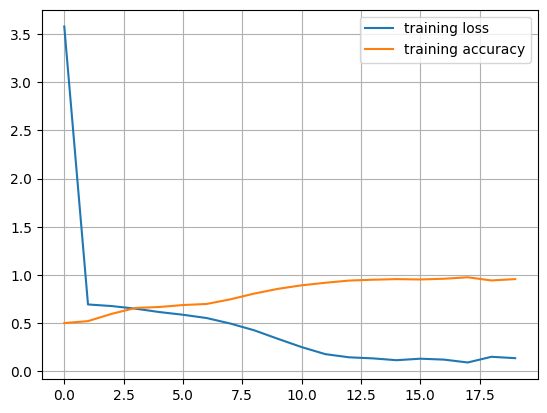

In [15]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

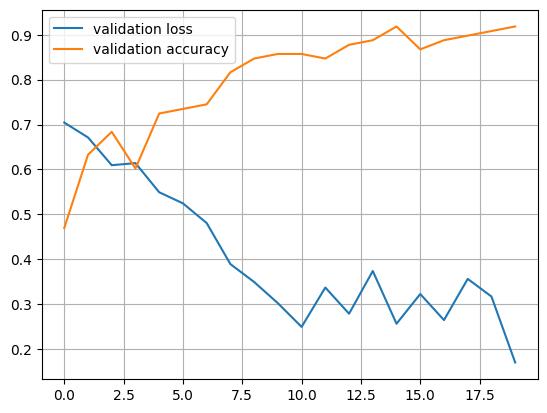

In [16]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

4/4 [==============================] - 5s 484ms/step


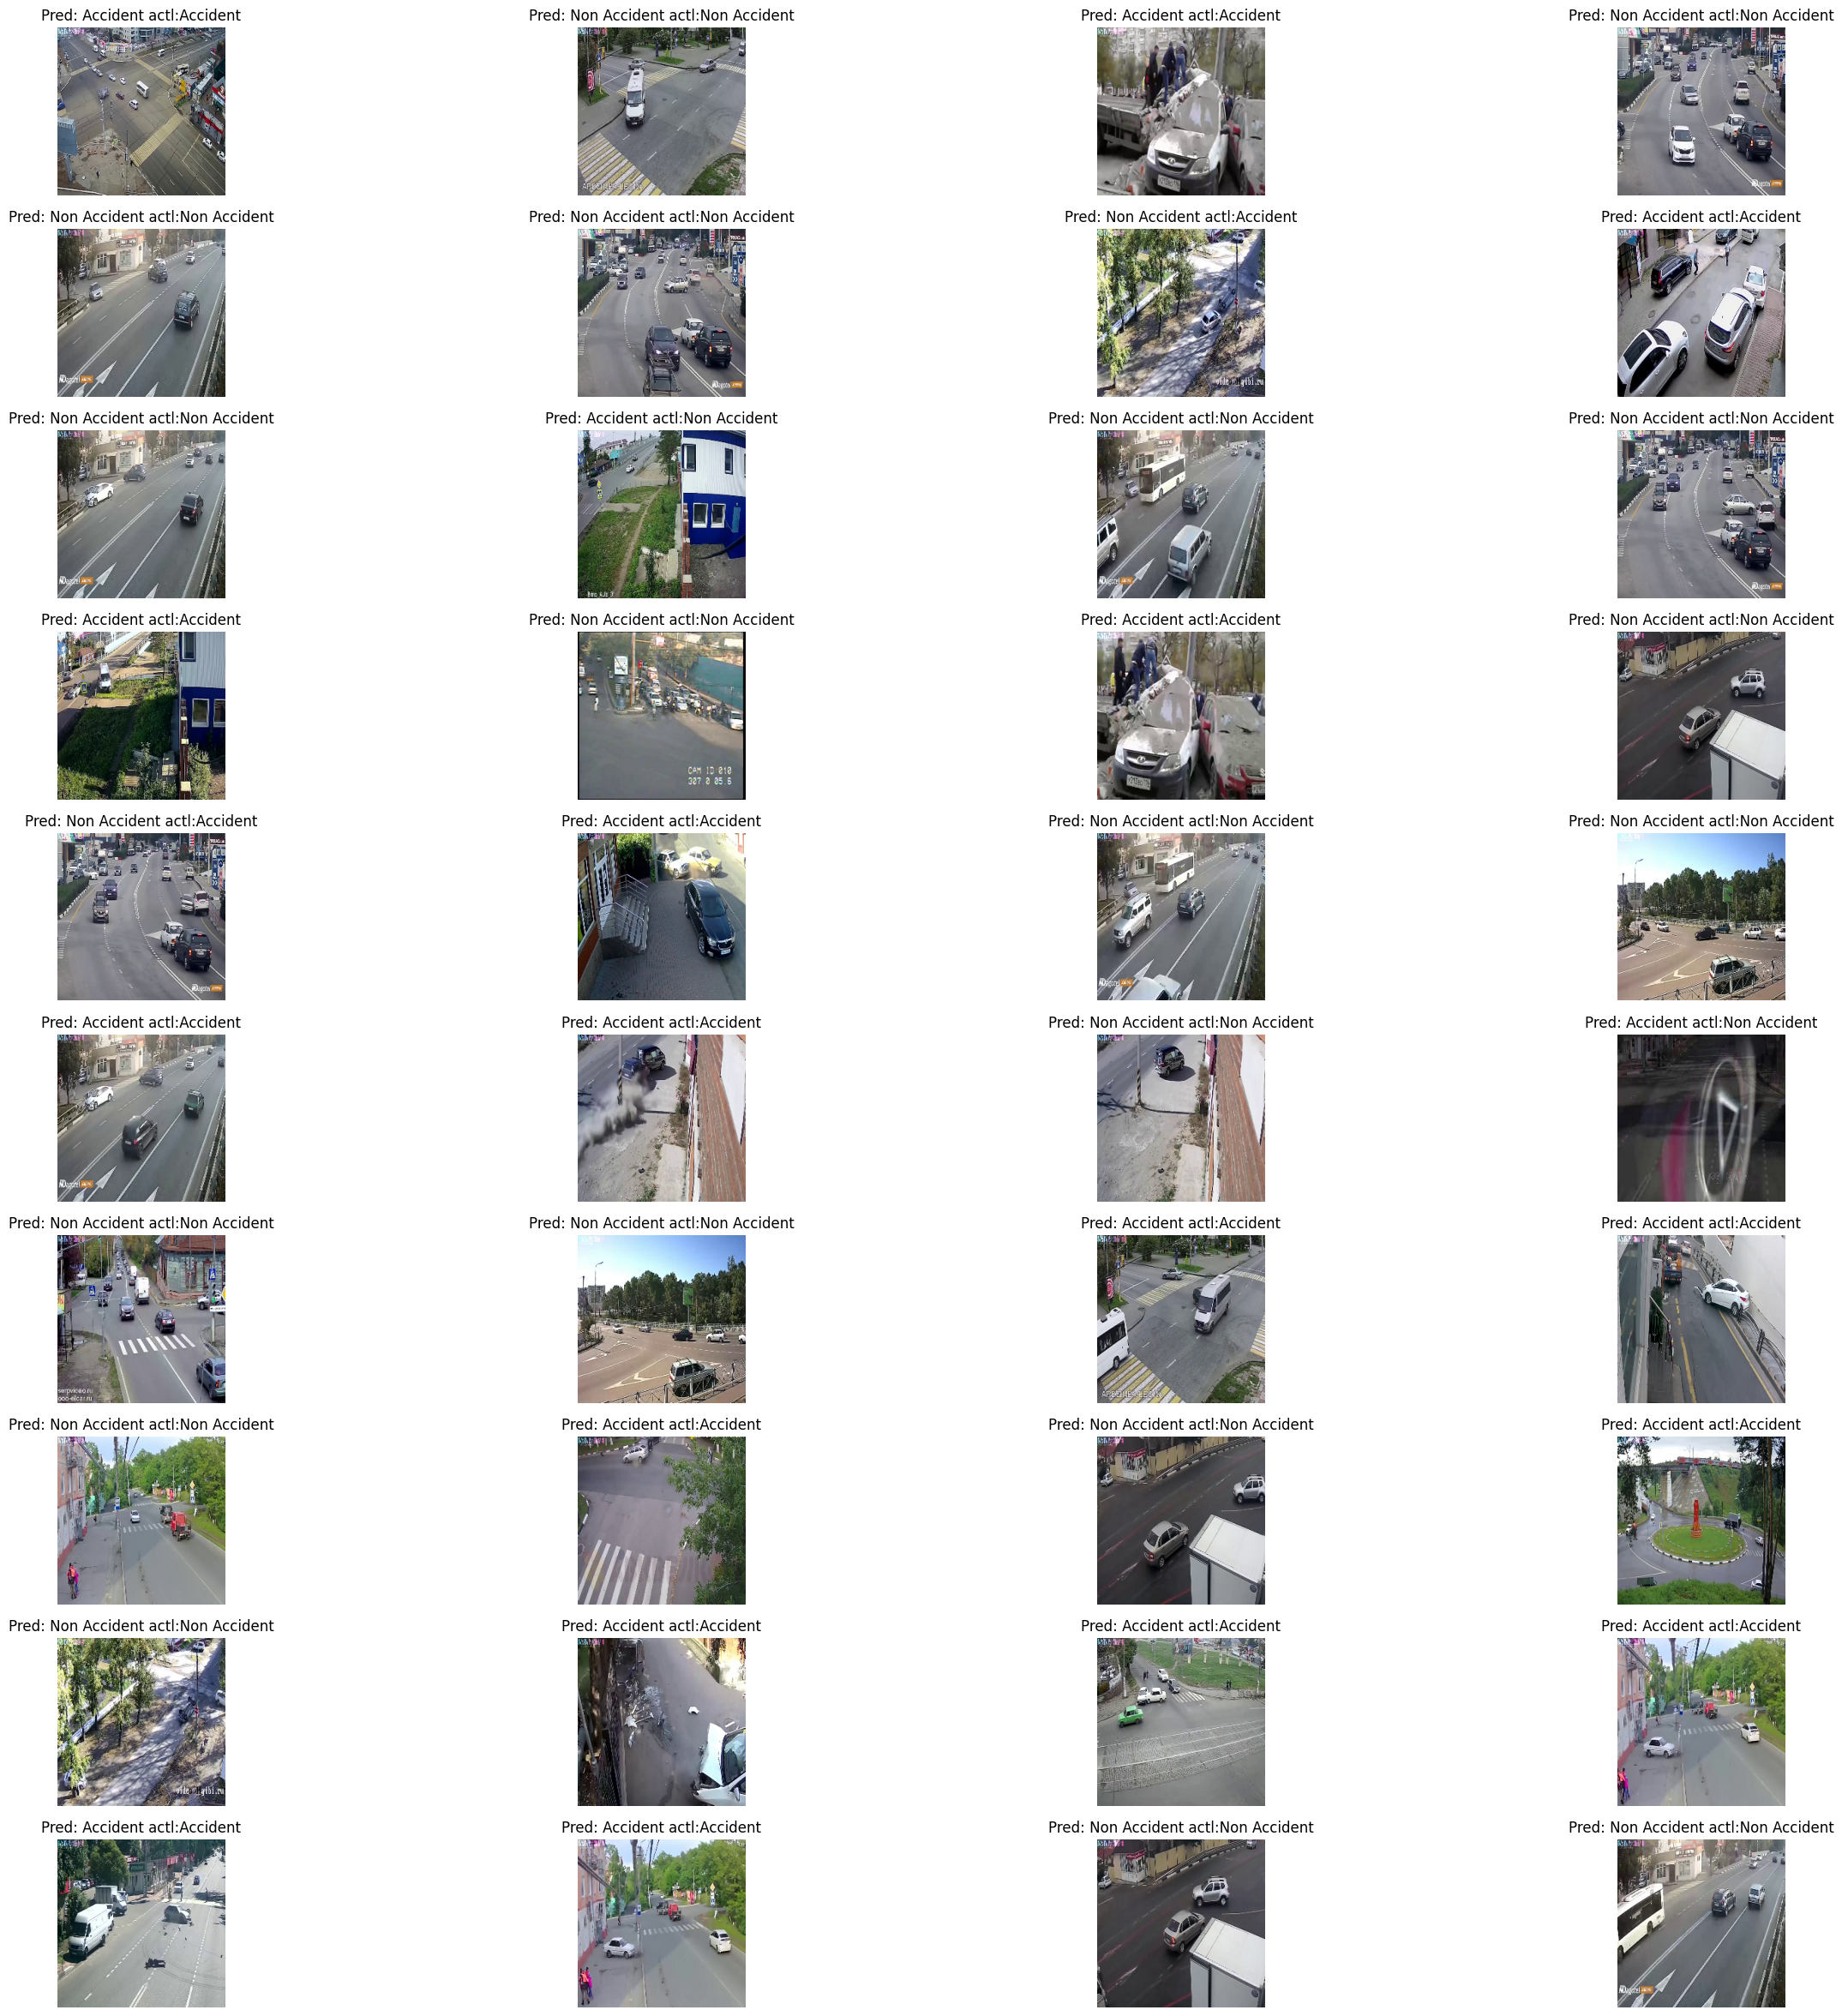

In [22]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [ ]:
import cv2
import base64
import math
import asyncio

cap = cv2.VideoCapture("D:/HAUI/DATN/Accident_detection/Code4/Accident-Detection-Web-App/model-implementor/assets/car-crash.mp4")

def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

while True:
    success, img = cap.read()
    results = predict_frame(img)
    detections = np.empty((0, 5))

    for r in results:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2 - x1, y2 - y1

            conf = math.ceil((box.conf[0] * 100)) / 100
            tempConf = conf

            if float(tempConf) > 0.4:
                cvzone.cornerRect(img, (x1, y1, w, h))
                cvzone.putTextRect(img, f'Accident {conf}', (max(0, x1), max(35, y1)), colorR=(0, 165, 255))
                currentArray = np.array([x1, y1, x2, y2, conf])
                detections = np.vstack((detections, currentArray))

                # if (time.time() - lastEmailSentTime) > emailDebounceTime and isSendMail == False:
                #     lastEmailSentTime = time.time()
                #     isSendMail = True
                #     task = asyncio.create_task(send_mail_async())

    trackerResults = tracker.update(detections)

    for result in trackerResults:
        x1,y1,x2,y2,id = result
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        id = int(id)
        w, h = x2 - x1, y2 - y1
        if totalAccidents.count(id) == 0:

            if getLoc is not None:
                # pass
                _, frame_encoded = cv2.imencode('.jpg', img)
                frame_base64 = base64.b64encode(frame_encoded).decode('utf-8')
                data = {
                    "address": getLoc.address,
                    "city": getLoc.raw.get("address", {}).get("city"),
                    "latitude": getLoc.latitude,
                    "longitude": getLoc.longitude,
                    "severityInPercentage": tempConf * 100,
                    "severity": "Moderate",
                    "frame": frame_base64
                }
                task = asyncio.create_task(send_mail_async_final(getLoc.latitude, getLoc.longitude, str(tempConf * 100), getLoc.address))
                task1 = asyncio.create_task(post_accident_data(data))
                # if response.status_code == 200:
                #     print("Request successful. 🔥🔥🔥🔥🔥")
                #     print(response.json())
                # else:
                #     print(f"Error ❌❌❌❌❌❌: {response.status_code}\n{response.text}")
            cvzone.cornerRect(img, (x1, y1, w, h), colorR=(255, 0, 255))
            cvzone.putTextRect(img, f'{id}', (max(0, x1), max(35, y1)))
            cx, cy = x1 + w // 2, y1 + h // 2
            cv2.circle(img, (cx, cy), 5, (255, 0, 255), cv2.FILLED)
            totalAccidents.append(id)

    # if(float(tempConf) > 0.4):
    #     if (time.time() - lastEmailSentTime) > emailDebounceTime and isSendMail == False:
    #         lastEmailSentTime = time.time()
    #         send_mail()
    #         isSendMail = True

    # Displaying the video
    cv2.imshow("Video Capture",  )
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    await asyncio.sleep(0.01)

if task & task1 is not None:
    await task, task1
# if task is not None:
#     await task

In [ ]:
init_db()

In [1]:
import sqlite3
conn = sqlite3.connect('accidents.db')
c = conn.cursor()
c.execute("SELECT * FROM accidents")
print(c.fetchall())
conn.close()

OperationalError: no such table: accidents

In [5]:
import cv2
import numpy as np
from detection import AccidentDetectionModel

model = AccidentDetectionModel("model.json", 'model_weights.h5')

print(f"Processing video: D:/HAUI/DATN/Accident_detection/Code1/Accident-Detection-System/video/test2.mp4")
try:
    cap = cv2.VideoCapture("D:/HAUI/DATN/Accident_detection/Code1/Accident-Detection-System/video/test2.mp4")
    if not cap.isOpened():
        print("Error: Could not open video file")

    frames = []  # Frames for prediction (resized and normalized)
    original_frames = []  # Original frames for saving the best one
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1
        # Keep the original frame for saving later
        original_frames.append(frame.copy())
        # Preprocess frame for prediction
        frame = cv2.resize(frame, (250, 250))  # Adjust size based on your model
        # frame = frame / 255.0  # Normalize
        frames.append(frame)
    
    cap.release()
    print(f"Extracted {frame_count} frames")
    
    # Check if frames are empty
    if len(frames) == 0:
        print("Error: No frames extracted from video")
    
    # Convert frames to numpy array for prediction
    frames = np.array(frames)
    print(f"Frames shape: {frames.shape}")
    
    # Predict using the model
    if model is None:
        print("Error: Model not loaded")
    
    # Predict on all frames
    accident_scores = []
    predictions = []
    for i, frame in enumerate(frames):
        pred, prob = model.predict_accident(frame[np.newaxis, :, :])
        if(pred == "Accident"):
            prob = (round(prob[0][0]*100, 2))
            if(prob > 90):
                print(f"Phát hiện tai nạn giao thông tại stream tại frame số {i}, độ chính xác {prob}%")
        # pred, prob = model.predict_accident(frame[np.newaxis, :, :])
        # prob = (round(prob[0][0]*100, 2))
        # print(f"Frame {i} - Prediction: {pred}, Probability: {prob}")
        # predictions.append(pred)
        # # Handle different possible formats of prob
        # if isinstance(prob, (list, np.ndarray)):
        #     # Assuming prob is like [no_accident_prob, accident_prob] or [[no_accident_prob, accident_prob]]
        #     prob_array = np.array(prob).flatten()
            
        #     accident_prob = float(prob_array[0])
        # else:
        #     # If prob is a scalar
        #     accident_prob = float(prob)
        # accident_scores.append(accident_prob)
    
    accident_scores = np.array(accident_scores)
    print(f"Accident scores: {accident_scores}")

    # Process predictions
    location = "298, Cầu Diễn, Minh Khai, Bắc Từ Liêm, Hà Nội"  # Dummy location
    max_score = np.max(accident_scores) if len(accident_scores) > 0 else 0.0
    accident_detected = max_score > 0.5  # Threshold for accident detection
    severity = max_score * 100  # Convert probability to percentage

    # If an accident is detected, find the frame with the highest score
    if accident_detected:
        max_pred_index = np.argmax(accident_scores)
        best_frame = original_frames[max_pred_index]
        print(f"Frame with highest accident detection score: {max_pred_index}, Score: {float(accident_scores[max_pred_index])}")
except Exception as e:
    print(f"Error processing video: {str(e)}")

Processing video: D:/HAUI/DATN/Accident_detection/Code1/Accident-Detection-System/video/test2.mp4
Extracted 128 frames
Frames shape: (128, 250, 250, 3)
1/1 [==============================] - 0s 223ms/step
Phát hiện tai nạn giao thông tại stream tại frame số 0, độ chính xác 99.7%
1/1 [==============================] - 0s 97ms/step
Phát hiện tai nạn giao thông tại stream tại frame số 1, độ chính xác 99.71%
1/1 [==============================] - 0s 63ms/step
Phát hiện tai nạn giao thông tại stream tại frame số 2, độ chính xác 99.35%
1/1 [==============================] - 0s 61ms/step
Phát hiện tai nạn giao thông tại stream tại frame số 3, độ chính xác 98.92%
1/1 [==============================] - 0s 65ms/step
Phát hiện tai nạn giao thông tại stream tại frame số 4, độ chính xác 98.09%
1/1 [==============================] - 0s 68ms/step
Phát hiện tai nạn giao thông tại stream tại frame số 5, độ chính xác 95.53%
1/1 [==============================] - 0s 96ms/step
Phát hiện tai nạn giao thông

In [26]:
import cv2
import numpy as np
from keras.models import load_model

# Bước 1: Load mô hình
model = load_model("model_weights.h5")

# Bước 2: Đọc video
video_path = "D:/HAUI/DATN/Accident_detection/Code1/Accident-Detection-System/video/test1.mp4"
cap = cv2.VideoCapture(video_path)

# Cấu hình theo input của mô hình
IMG_SIZE = (250, 250)  # hoặc kích thước mà model yêu cầu
THRESHOLD = 0.9       # Ngưỡng xác định có tai nạn hay không

accident_detected = False
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Bước 3: Tiền xử lý ảnh
    img = cv2.resize(frame, IMG_SIZE)
    # img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)

    # Bước 4: Dự đoán
    prediction = model.predict(img)
    prob = prediction[0][0]  # nếu output là [[0.8]] kiểu binary classification

    print(f"Frame {frame_count} - Accident probability: {prob:.2f}")

    if prob > THRESHOLD:
        accident_detected = True
        print("🚨 Accident Detected!")
        

cap.release()

if accident_detected:
    print("===> ✅ Tai nạn giao thông được phát hiện trong video!")
else:
    print("===> ❌ Không có tai nạn giao thông nào được phát hiện.")


1/1 [==============================] - 0s 155ms/step
Frame 1 - Accident probability: 0.00
1/1 [==============================] - 0s 57ms/step
Frame 2 - Accident probability: 0.00
1/1 [==============================] - 0s 63ms/step
Frame 3 - Accident probability: 0.00
1/1 [==============================] - 0s 67ms/step
Frame 4 - Accident probability: 0.00
1/1 [==============================] - 0s 62ms/step
Frame 5 - Accident probability: 0.00
1/1 [==============================] - 0s 63ms/step
Frame 6 - Accident probability: 0.00
1/1 [==============================] - 0s 57ms/step
Frame 7 - Accident probability: 0.00
1/1 [==============================] - 0s 65ms/step
Frame 8 - Accident probability: 0.00
1/1 [==============================] - 0s 51ms/step
Frame 9 - Accident probability: 0.00
1/1 [==============================] - 0s 51ms/step
Frame 10 - Accident probability: 0.01
1/1 [==============================] - 0s 100ms/step
Frame 11 - Accident probability: 0.00
1/1 [============